In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [81]:
df=pd.read_csv("Company_Data.csv")
df.head()

Sales  CompPrice  Income  Advertising  ...  Age  Education Urban   US
0   9.50        138      73           11  ...   42         17   Yes  Yes
1  11.22        111      48           16  ...   65         10   Yes  Yes
2  10.06        113      35           10  ...   59         12   Yes  Yes
3   7.40        117     100            4  ...   55         14   Yes  Yes
4   4.15        141      64            3  ...   38         13   Yes   No

[5 rows x 11 columns]

In [82]:
df.shape

(400, 11)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [84]:
df.isna().sum() #no null values 

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

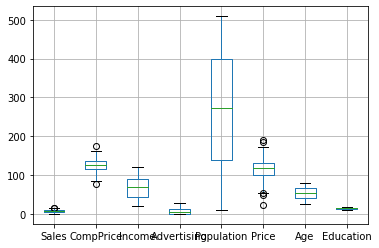

In [85]:
df.boxplot()

In [86]:
le=preprocessing.LabelEncoder()
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])
df["US"]=le.fit_transform(df["US"])
df["Urban"]=le.fit_transform(df["Urban"])

In [87]:
df.head()

Sales  CompPrice  Income  Advertising  ...  Age  Education  Urban  US
0   9.50        138      73           11  ...   42         17      1   1
1  11.22        111      48           16  ...   65         10      1   1
2  10.06        113      35           10  ...   59         12      1   1
3   7.40        117     100            4  ...   55         14      1   1
4   4.15        141      64            3  ...   38         13      1   0

[5 rows x 11 columns]

In [88]:
df.describe()

Sales   CompPrice      Income  ...   Education       Urban          US
count  400.000000  400.000000  400.000000  ...  400.000000  400.000000  400.000000
mean     7.496325  124.975000   68.657500  ...   13.900000    0.705000    0.645000
std      2.824115   15.334512   27.986037  ...    2.620528    0.456614    0.479113
min      0.000000   77.000000   21.000000  ...   10.000000    0.000000    0.000000
25%      5.390000  115.000000   42.750000  ...   12.000000    0.000000    0.000000
50%      7.490000  125.000000   69.000000  ...   14.000000    1.000000    1.000000
75%      9.320000  135.000000   91.000000  ...   16.000000    1.000000    1.000000
max     16.270000  175.000000  120.000000  ...   18.000000    1.000000    1.000000

[8 rows x 11 columns]

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [89]:
  #hence we will considere sales more than 10 as high sale
  df["Sales"]=np.where(df["Sales"]>=10,"High","Low")



In [90]:
df

Sales  CompPrice  Income  Advertising  ...  Age  Education  Urban  US
0     Low        138      73           11  ...   42         17      1   1
1    High        111      48           16  ...   65         10      1   1
2    High        113      35           10  ...   59         12      1   1
3     Low        117     100            4  ...   55         14      1   1
4     Low        141      64            3  ...   38         13      1   0
..    ...        ...     ...          ...  ...  ...        ...    ...  ..
395  High        138     108           17  ...   33         14      1   1
396   Low        139      23            3  ...   55         11      0   1
397   Low        162      26           12  ...   40         18      1   1
398   Low        100      79            7  ...   50         12      1   1
399   Low        134      37            0  ...   49         16      1   1

[400 rows x 11 columns]

In [91]:
#transfering data into numeric form
df["Sales"]=le.fit_transform(df["Sales"])

sploitting data into train test

In [92]:
x=df.iloc[:,1:].values
y=df.iloc[:,0]


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

**Using Grid search method to find best max_depth**

In [94]:
from sklearn.model_selection import GridSearchCV
n = np.array(range(1,21))
param_grid = dict(max_depth=n)
param_grid

model=DecisionTreeClassifier(criterion="entropy")   #using entropy we can build good model with less nodes
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)



GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [101]:
print((grid.best_score_)*100,"%")
print(grid.best_params_)

85.9375 %
{'max_depth': 9}


**Using max_depth 13 for good accurancy**

In [96]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=13)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

In [97]:
pred=model.predict(x_test)

In [98]:
print(np.round(np.mean(pred==y_test)*100,2),"%") #Accurancy

85.0 %


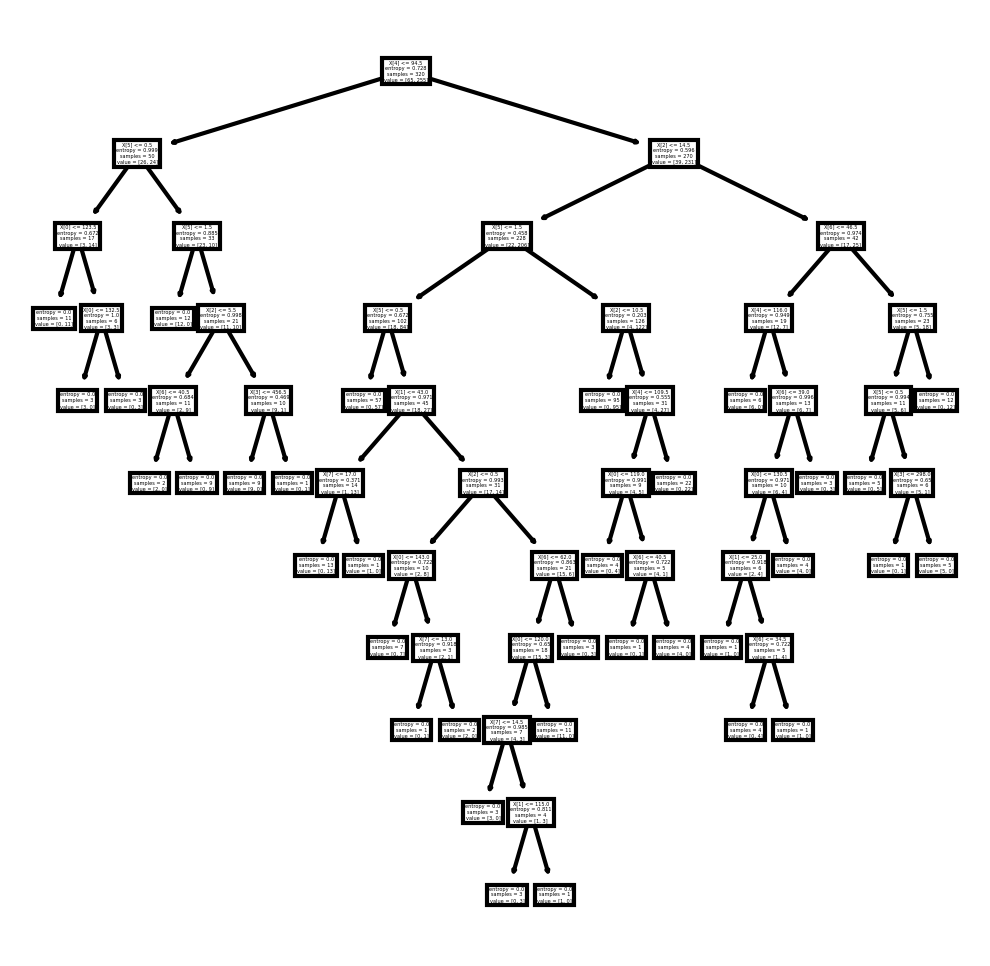

In [99]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)
plt.show()

[]

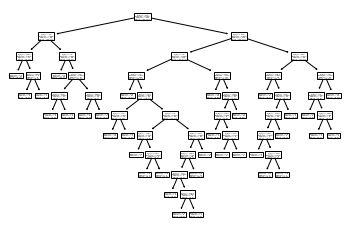

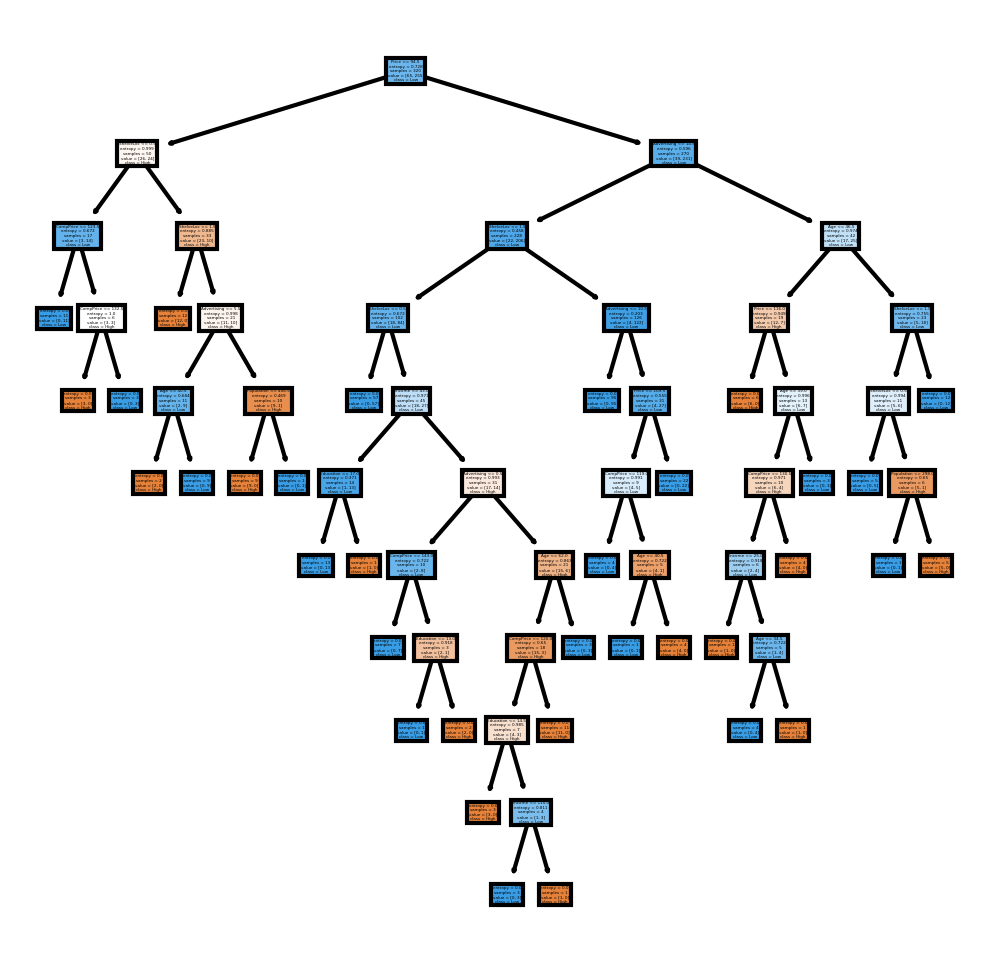

In [100]:
tree.plot_tree(model)
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=[ 'High', 'Low']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)
plt.plot()